### write in short for each of the following:

### SupervisedLearning:

### Classification versus regression Problem:

### Decision Tree:

### Entropy:

### Information Gain:



### $ Entropy = \sum_{i}\;-P_{i}log_{2}P_{i} $    ,   $\;\;\;\;\;\;$ $ where  P_{i} \; is \;  the \; probability\; of\; class \;i$

### Information Gain = Entropy(Parent) - [average entropy (children)]

### Node selection based on Information Gain :

### Overfitting:

### Underfitting:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
dbts_new = pd.read_csv('C:/Users/Administrator/imputed_data_diabetes1.csv')
dbts_new.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic
0,6,148.0,72,35.00000,125,33.6,0.627,50,1
1,1,85.0,66,29.00000,125,26.6,0.351,31,0
2,8,183.0,64,29.15342,125,23.3,0.672,32,1
3,1,89.0,66,23.00000,94,28.1,0.167,21,0
4,0,137.0,40,35.00000,168,43.1,2.288,33,1


In [ ]:
from sklearn.model_selection import train_test_split
spltd_data = dbts_new.values
# separate the dataset into input and output components
X = spltd_data [:,0:8]
Y = spltd_data[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## Now, lets apply the cleaned data into one of the learning algorithm called Decision Tree using sklearn library.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
algo = DecisionTreeClassifier(criterion = "entropy",random_state = 42, max_depth = 4 , min_samples_leaf=5)  # decision tree witha depth of 4
algo.fit(X_train, Y_train)
result = algo.score(X_test, Y_test)
print(("The Decision Tree model has given Accuracy of: %.3f%%") % (result*100.0))

The Decision Tree model has given Accuracy of: 72.727%


### Decision Tree Plot

[Text(0.5267857142857143, 0.9, 'X[1] <= 143.5\nentropy = 0.936\nsamples = 614\nvalue = [398, 216]'),
 Text(0.2857142857142857, 0.7, 'X[5] <= 26.95\nentropy = 0.805\nsamples = 476\nvalue = [359, 117]'),
 Text(0.14285714285714285, 0.5, 'X[1] <= 127.0\nentropy = 0.206\nsamples = 124\nvalue = [120, 4]'),
 Text(0.07142857142857142, 0.3, 'X[4] <= 48.5\nentropy = 0.077\nsamples = 106\nvalue = [105, 1]'),
 Text(0.03571428571428571, 0.1, 'entropy = 0.439\nsamples = 11\nvalue = [10, 1]'),
 Text(0.10714285714285714, 0.1, 'entropy = 0.0\nsamples = 95\nvalue = [95, 0]'),
 Text(0.21428571428571427, 0.3, 'X[3] <= 27.5\nentropy = 0.65\nsamples = 18\nvalue = [15, 3]'),
 Text(0.17857142857142858, 0.1, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.25, 0.1, 'entropy = 0.918\nsamples = 9\nvalue = [6, 3]'),
 Text(0.42857142857142855, 0.5, 'X[7] <= 28.5\nentropy = 0.905\nsamples = 352\nvalue = [239, 113]'),
 Text(0.35714285714285715, 0.3, 'X[3] <= 29.077\nentropy = 0.695\nsamples = 182\nvalue = [148

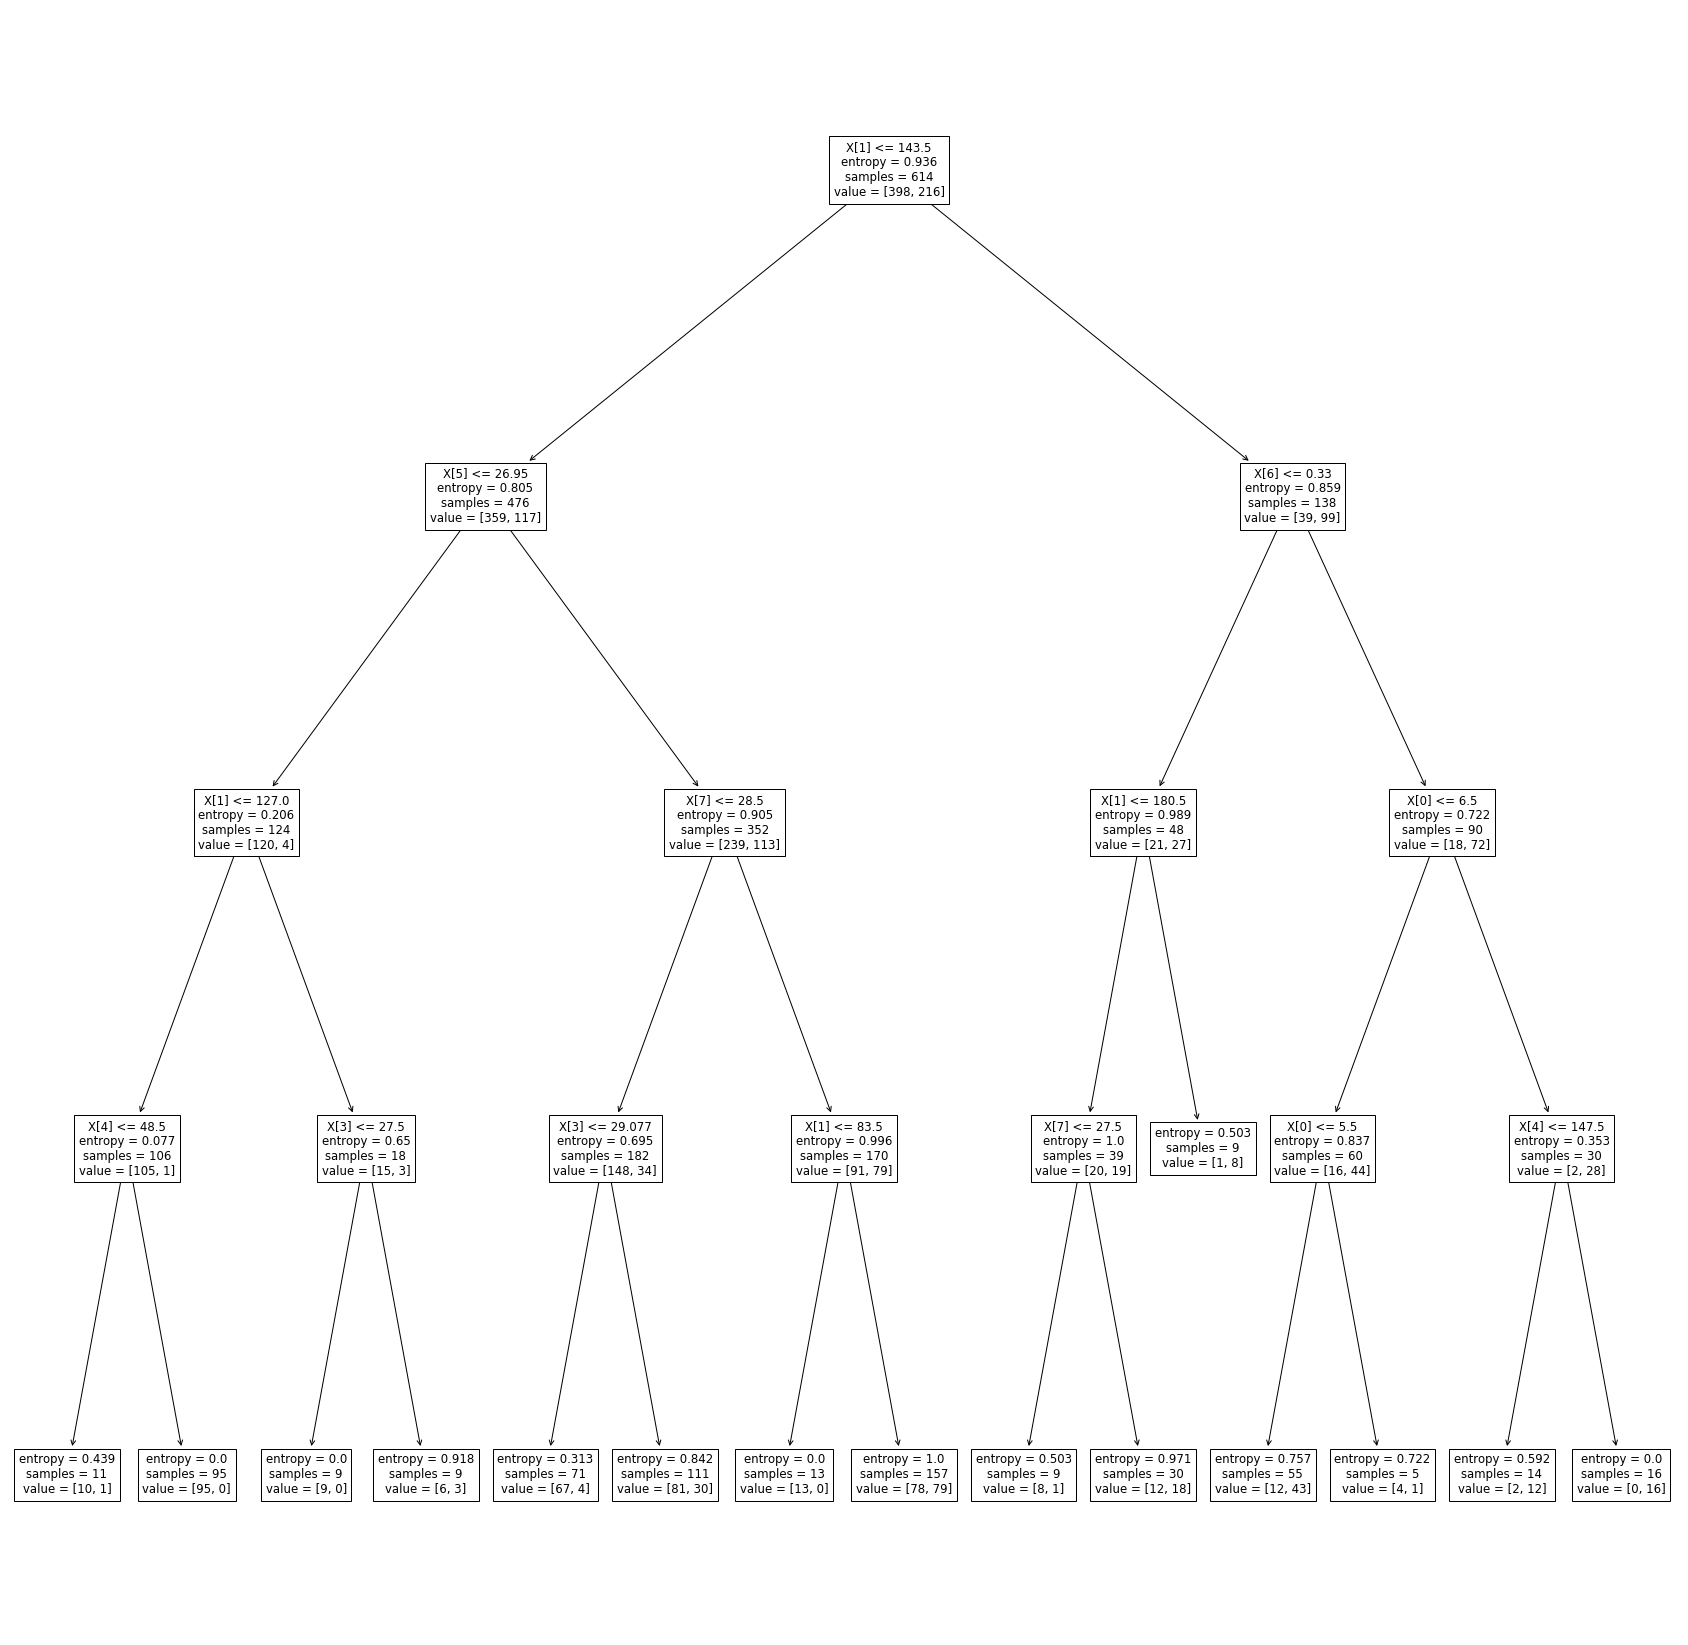

In [ ]:
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(algo)

## Performance Metrics of learning algorithm

### Evaluate the predictive accuracy of a model


### Create Confusion Matrix to compare the number of predicted values against actual labeled value

In [ ]:
Y_Prdct = algo.predict(X_test)
print(Y_Prdct)

[0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.]


In [ ]:
from sklearn import metrics
cf_mtrx = metrics.confusion_matrix(Y_test, Y_Prdct)
cf_mtrx

array([[67, 35],
       [ 7, 45]], dtype=int64)

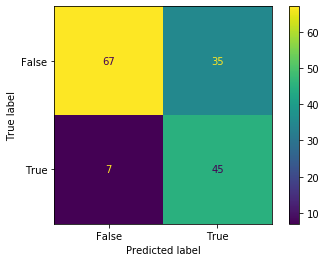

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_mtrx, display_labels = [ False,True]) #[False, True])
cm_display.plot()
plt.show()

### Data Interpretation of Confusion Matrix
****
 <b>True negative (TN) and positive (TP) --> Of the total test dataset the decision tree model predicted 67 data rows as true negative and 45 data rows as true postive which means the actual labels matched the predicted labelsfor real diabetic and no diabetic labels.</b>
****
<b>False Positive --> Actually the sample Daibetic label is false/non-diabetic but the model predicts the sample as true or diabetic. So for the 35 non diabetic samples the model predicted all of them as diabetic which isnt the case.  </b>
****
<b>False Negative --> Actually the sample Daibetic label is true/diabetic but the model predicts the sample as fasle or non- diabetic. So for the 7 diabetic samples the model predicted all of them as non-diabetic which isnt the case.
</b>

### Accuracy= Number of correctly classified objects / Number of classified objects

#### $ i.e Accuracy  =   (TP + TN)\; /\; (TP + TN + FP +  FN)$

#### Evaluate separately for each class C

#### $ Precision (p)= (TP )\; /\; (TP + FP)$

#### $ Recall (r) = (TP )\; /\; (TP + FN)$

### Maximize
#### $ F-measure (F) =  2rp \;/ \;(r+p)$

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_Prdct))

              precision    recall  f1-score   support

         0.0       0.91      0.66      0.76       102
         1.0       0.56      0.87      0.68        52

    accuracy                           0.73       154
   macro avg       0.73      0.76      0.72       154
weighted avg       0.79      0.73      0.73       154

